# Data Visualization

When our data is low-dimensional (or when we care about pairwise combinations of data), visualization is a great way to get an overall idea of how the data is behaving.  It will help us determine how well the models we create fit the data, and will also give us a tool to visually find potential outliers.  These are the two main visualization tools we are going to use:
1. Matplotlib.  One of the most commonly used graphing tools, matplotlib produces excellent static 2D and 3D plots.
2. Seaborn. Seaborn focuses on visualizing statistical graphs, it is built on top of Matplotlib.

Both packages allow embedding of graphs directly into Jupyter notebooks, as well as providing the option of outputting graphs as files; matplotlib outputs as picture files (.png, etc.), while Bokeh outputs as HTML files.

In [1]:
import pandas as pd
import numpy as np

## Matplotlib

Matplotlib was started by John Hunter, a neurobiologist who wanted to port the plotting ability of matlab to python. He was a famously welcoming member of the python community, leading to the creation of the pydata and numfocus organization, which we have to thank for the open source data science stack today.

Our first step will be to import matplotlib, and then tell it to show the graphs we make *inside* the notebooks (instead of opening in a separate window/program).  Then we tell it how large a picture to show:

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) #setting figure size

You might notice, we have used `%pylab inline` here, as well as putting graphs inline, this imports a few packages - the main thing we need to know is that it uses: from `from numpy import *` and `from pylab import *`. This means our namespace has the entire contents of NumPy and Pylab in it!

In [3]:
pwd

'C:\\Users\\Ali\\Desktop\\BrainStation\\JupNotebooks'

In [4]:
df = pd.read_csv('customer_info.csv')
df.head()

,CUSTOMER_ID,INDUSTRY,EMP,ANNUAL_SALES,PROVINCE,MOBILITY,INTERNET
0,129078,Finance and Insurance,36.0,NaN,AB,10192.825459,699.539869
1,128424,Construction,261.0,10675108.0,BC,17367.492873,1907.819410
2,125960,Finance and Insurance,10.0,756786.0,AB,6162.609229,1789.017919
3,120981,Construction,31.0,1223808.0,BC,19176.373541,2123.016418
4,129251,Education,NaN,1148650.0,AB,1538.194116,1620.096543


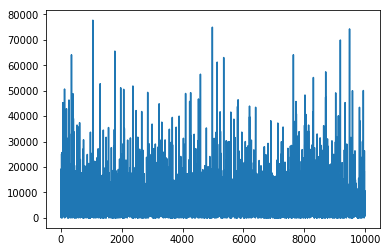

In [5]:
#We dont necessarily need MatplotLib to plot things. We can plot datafram columns directly
#using base plot function
df['MOBILITY'].plot()

In [6]:
#this is the basic structure of a MatPLotlib plot

# plt.figure()
# plt.plot(_______)
# plt.show()

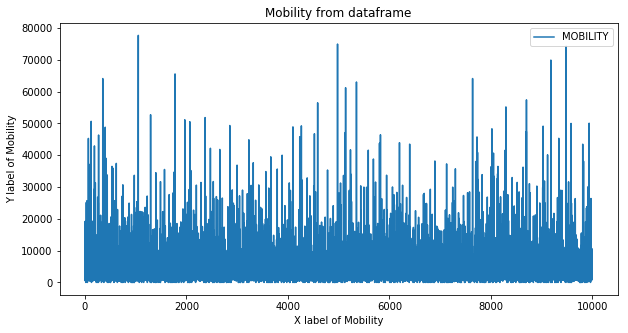

In [7]:
#we can make line plots like this:
plt.figure(figsize = (10,5))
#plt.plot([2,3,8,1,10]) #this will create a line plot where the values in the list are plotted against their index value
plt.plot(df['MOBILITY'])
plt.title('Mobility from dataframe')
plt.ylabel('Y label of Mobility')
plt.xlabel('X label of Mobility')
plt.legend()
plt.show()

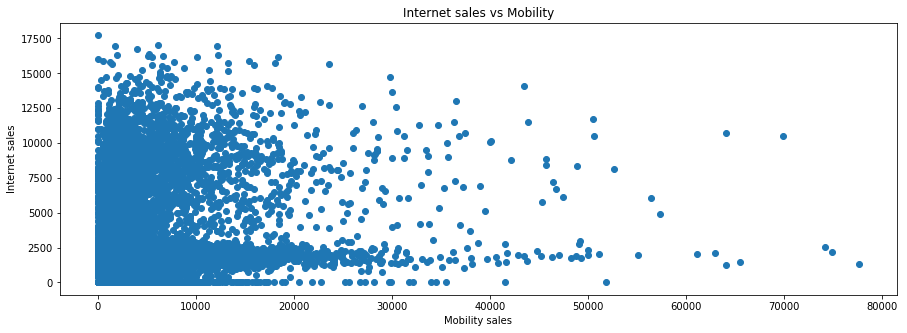

In [8]:
#A scatterplot will be much more useful - two ordered sets of numbers are required
# plt.figure()
# plt.scatter(x_data, y_data)
# plt.show()

plt.figure(figsize=(15,5))
plt.scatter(df['MOBILITY'], df['INTERNET'])
plt.title('Internet sales vs Mobility')
plt.xlabel('Mobility sales')
plt.ylabel('Internet sales')
plt.show()

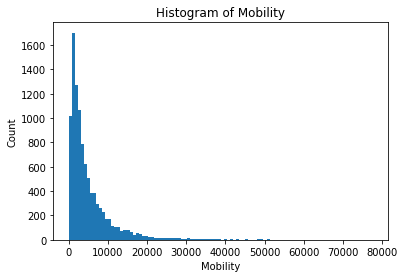

In [9]:
#Histograms are another way to view data - single parameter of numerical data - good to look at distributions
# plt.figure()
# plt.hist(df_col_numeric)
# plt.show()


plt.figure()
#plt.hist(df['MOBILITY'])
plt.hist(df['MOBILITY'], bins = 100) #increase bin size to get mor granularity
plt.title('Histogram of Mobility')
plt.xlabel('Mobility')
plt.ylabel('Count')
plt.show()



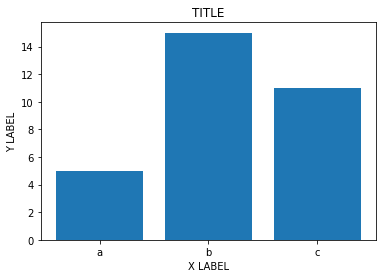

In [10]:
#Here is how we make a bar chart
# plt.figure()
# plt.bar(bar names, bar heights)
# plt.show()


plt.figure()
plt.bar(['a','b','c'], [5,15,11])
plt.title('TITLE')
plt.ylabel('Y LABEL')
plt.xlabel('X LABEL')
plt.show()

Food Services            2965
Construction             2091
Finance and Insurance    1647
Healthcare               1533
Education                 980
Agriculture               675
Name: INDUSTRY, dtype: int64


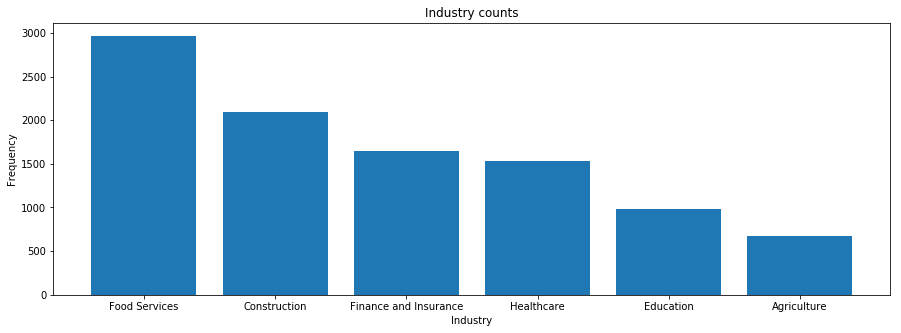

In [11]:
#Lets say we want to plot freq of Inustries (note: bar charts for categorical, hist for numerical)

#Industry category -- value.counts returns a series with values (counts) by index (industry names)
print(df['INDUSTRY'].value_counts())
type(df['INDUSTRY'].value_counts())

#Since it outputs as a series, we can get the industry labels by using .index 
#and we can g the frequency using the .values
df['INDUSTRY'].value_counts().index
df['INDUSTRY'].value_counts().values

plt.figure(figsize =(15, 5)) #so that it fits. also e can tilt labels
plt.bar(df['INDUSTRY'].value_counts().index, df['INDUSTRY'].value_counts().values)
plt.title('Industry counts')
plt.ylabel('Frequency')
plt.xlabel('Industry')
plt.show()


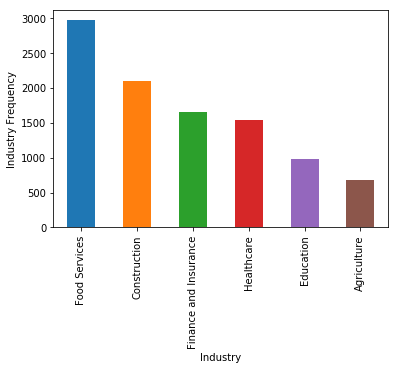

In [12]:
#we can achieve the same type of categorical freq plot direcly from the dataframe

df['INDUSTRY'].value_counts().plot(kind='bar')
plt.ylabel('Industry Frequency')
plt.xlabel('Industry')
plt.show()

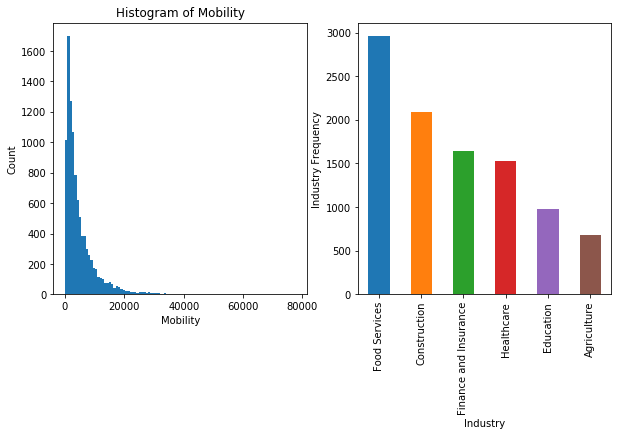

In [13]:
#We can create subplots to combine multiple plots into one larger output
#plt.subplots(#rows, #cols)

plt.subplots(1,2, figsize=(10,5))
plt.subplot(121) #saying what the first of two plots is (could have format "(1,2,1)" or "(121)". NOTE the SUBPLOT instead of SUBPLOTS
plt.hist(df['MOBILITY'], bins = 100) #increase bin size to get mor granularity
plt.title('Histogram of Mobility')
plt.xlabel('Mobility')
plt.ylabel('Count')

plt.subplot(122)
df['INDUSTRY'].value_counts().plot(kind='bar')
plt.ylabel('Industry Frequency')
plt.xlabel('Industry')

plt.subplots_adjust(wspace=0.2) #to add spacing between plots. Could also just hide labels of other graphs and just use one if they are the same

plt.show()



### Basic Plots

We'll start with very basic plotting. This requires very little code, but it does not give us much control over the format of the output.

In [14]:
df1 = pd.DataFrame({'A':np.random.randint(75,200,50),'B':np.random.randint(0,25,50),'C':np.random.randint(-50,15,50)})
df1.head(10)

,A,B,C
0,148,24,-6
1,86,21,-19
2,171,19,-50
3,162,13,-29
4,177,5,-28
5,79,11,10
6,137,7,-46
7,158,2,6
8,198,13,-5
9,144,5,4


We can plot a single column by calling `.plot()` on the column object:

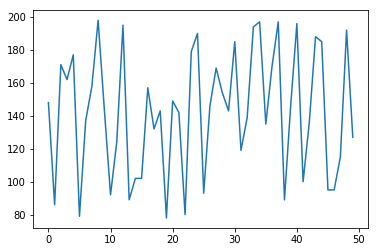

In [15]:
df1['A'].plot();

By default, using `.plot()` will connect individual data points with lines to create a continuous graph.  If we do not specify colours, matplotlib will decide colours for us.  We can plot all three columns at the same time by simply calling the dataframe:

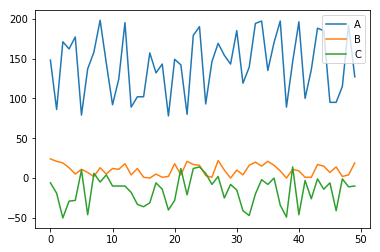

In [16]:
df1.plot();

The reason we put a ; at the end of the plot command is that it gets rid of an object identifier that is normally printed, and makes the presentation cleaner.  Without it, we get:

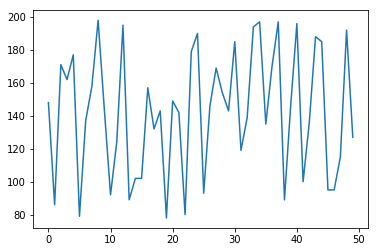

In [17]:
df1['A'].plot()

We can do some customization by feeding the function various arguments. This includes specifying a title, color, and telling it to put a legend (even if there's only one graph).

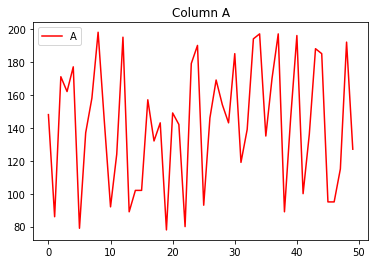

In [18]:
df1['A'].plot(title='Column A',legend=True, color='red')

If we didn't want a continuous graph, we could use the `.scatter()` to see just the data points.  This works slightly differently to the `.plot()` command. The `scatter()` is a function that takes two arguments:  the independent variable (in this case, our dataframe's index), and the dependent variable (any of the columns we want).

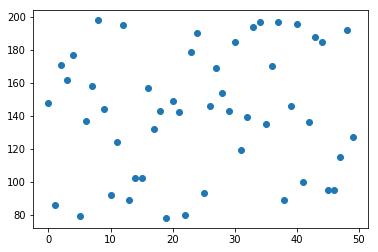

In [19]:
plt.scatter(df1.index,df1['A']);

### Types of Graphs, Uses

We've seen two types of graphs so far, scatter plots and line graphs. What kind of data should we use these graphs for? Here are general guidelines:

1. **Line graphs** are good for visualizing data that is continuously connected in some way, e.g.: temperature changing over time.
2. **Scatter plots** are useful for data points that are individually separate and distinct, e.g.: the house price vs square footage data we saw in Unit 1.

In [20]:
dfhp = pd.DataFrame({'House Price':[284, 302, 376, 372, 341, 385, 361, 345, 371, 317, 337, 404, 408, 367, 486, 402, 
                                    477, 475, 455, 456, 492, 515, 535, 567, 519, 580, 534, 539, 550, 618, 589, 624, 
                                    566, 630, 624, 596, 634, 639, 721, 690, 688, 751, 777, 798, 821, 781, 800, 797, 803, 
                                    898]}, index=[1710, 1737, 1767, 1779, 1791, 1810, 1819, 1825, 1869, 1896, 1963, 2047, 
                                                  2060, 2201, 2328, 2337, 2465, 2498, 2538, 2577, 2579, 2671, 2680, 2758, 
                                                  2831, 2866, 3018, 3053, 3084, 3106, 3133, 3143, 3156, 3159, 3169, 3247, 
                                                  3384, 3391, 3528, 3537, 3596, 3790, 3811, 3970, 4025, 4046, 4204, 4211, 
                                                  4274, 4410])
dfhp.index.name = 'Square Footage'
dfhp.head()

,House Price
Square Footage,
1710,284
1737,302
1767,376
1779,372
1791,341


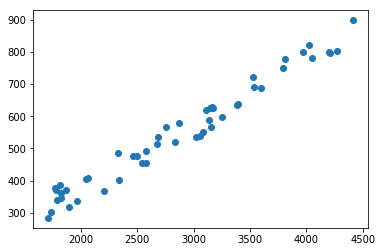

In [21]:
plt.scatter(dfhp.index,dfhp['House Price']);

We can very easily visualize the data this way, because each data point shows the values for a particular house, but the houses aren't related to each other in any sense.  It would be much more confusing to view the graph like this:

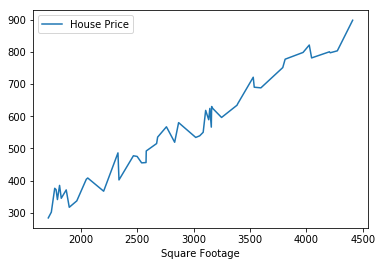

In [22]:
dfhp.plot()

It's not really clear what we're looking at there.

However, we can look at temperature data which is continually changing as time goes on:

In [23]:
dftp = pd.DataFrame({'Temp':[10.1, 9.7, 10.4, 10.4, 12.2, 12.8, 13.3, 13.1, 13.8, 13.3, 14.6, 14.7, 14.1, 15.8, 15.8, 
                             16.2, 16.4, 16.0, 15.9, 17.9, 16.6, 17.5, 17.4, 18.2, 18.1, 17.3, 18.6, 18.7, 17.5, 17.2,
                             17.2, 17.3, 18.2, 17.9, 18.1, 17.7, 16.9, 18.3, 17.0, 16.3, 17.4, 15.7, 15.4, 15.2, 15.7,
                             15.7, 15.0, 14.0, 14.8]},
                    index=pd.date_range('2017-05-01 08:00:00', periods=49, freq='0.25H'))
dftp.head()

,Temp
2017-05-01 08:00:00,10.1
2017-05-01 08:15:00,9.7
2017-05-01 08:30:00,10.4
2017-05-01 08:45:00,10.4
2017-05-01 09:00:00,12.2


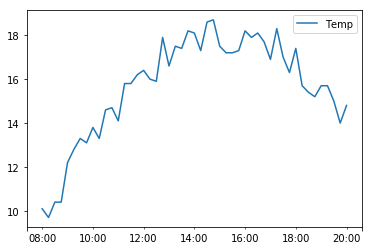

In [24]:
dftp.plot();

Visually, this plot makes more sense, we can see the connections between the data points we have.

There are many other kinds of graphs available in Matplotlib, such as histograms:

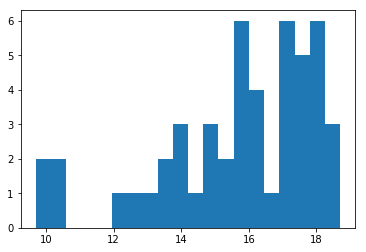

In [25]:
plt.hist(dftp['Temp'], bins=20);

This kind of graph effectively counts the number of values the data set has.  

For an overview of the kinds of graphs available, visit the Matplotlib examples gallery:  https://matplotlib.org/gallery.html. 

### Multiple Plots

If we run three separate scatter commands, one for each of the columns, Python will automatically place them in the same graph because they all share the same index (independent variable).

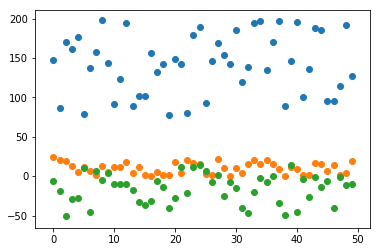

In [26]:
plt.scatter(df1.index,df1['A']);
plt.scatter(df1.index,df1['B']);
plt.scatter(df1.index,df1['C']);

Similarly, we can get equivalent plotting with the `.plot()` command by either specifying a list of columns to use, or using sequential plot commands:

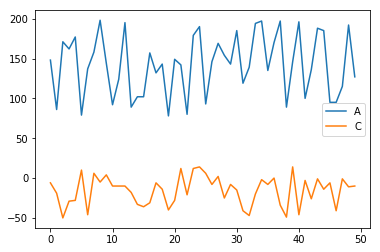

In [27]:
df1[['A','C']].plot();

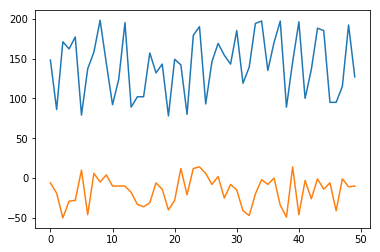

In [28]:
df1['A'].plot();
df1['C'].plot();

However, if we had two different dataframes (distinct indices), and called sequential plots, we would get:

In [29]:
df = pd.DataFrame({'X':np.random.randint(0,100,30)},index=pd.date_range('2016-01-01',periods=30,freq='h'))

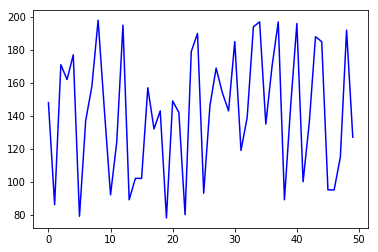

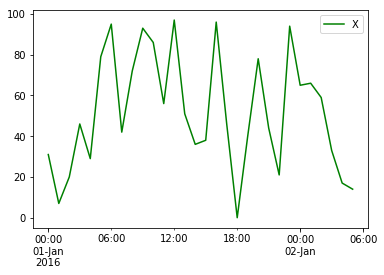

In [30]:
df1['A'].plot(color='blue')
df.plot(color='green')

### More Advanced Plots

While the methods of plotting we have seen so far are very handy for getting a quick insight into our data sets, Matplotlib allows us much finer control over graphing.  The code becomes a little more complicated, and has the following format:

```
fig = plt.figure()  # declare a figure to a variable name
plt.plot(x, y1, label='name1', color='colorname or hex code')
plt.plot(x, y2, label='name2', color='colorname or hex code')  # repeat for as many things as you are plotting
plt.xlabel('label for x', size=number)
plt.ylabel('label for y', size=number)
plt.legend()
plt.grid()  # If this is included, a grid will be placed on your graph
plt.title('Title')
plt.show()
```

Let's use our dataframe `d1` to create a plot.  We will label the y-axis 'Price', the x-axis 'Days After First Trade', and the title of the plot will be 'Stock Prices'.  We'll set the grid to `True` to show a grid on the graph.

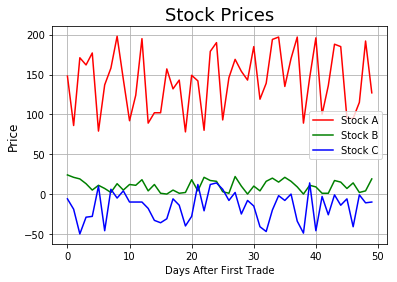

In [31]:
fig = plt.figure()
plt.plot(df1.index,df1['A'],label='Stock A', color='red')
plt.plot(df1.index,df1['B'],label='Stock B', color='green')
plt.plot(df1.index,df1['C'],label='Stock C', color='blue')
plt.xlabel('Days After First Trade', size=10)
plt.ylabel('Price',size=12)
plt.legend()
plt.title('Stock Prices',size=18)
plt.grid(b=True)
plt.show()

That looks much fancier.  We notice that there are some gaps on either end of the graph. We can fix this by telling Matplotlib exactly what range to graph from by using the `plt.xlim()` command.  We'll tell it to graph from 0 to 49, because those are the limits of our data.

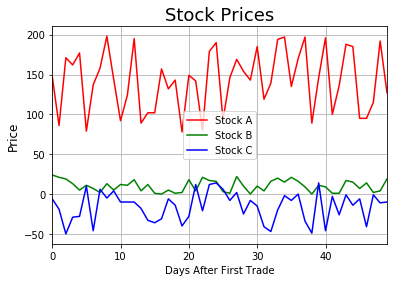

In [32]:
fig = plt.figure()
plt.plot(df1.index,df1['A'],label='Stock A', color='red')
plt.plot(df1.index,df1['B'],label='Stock B', color='green')
plt.plot(df1.index,df1['C'],label='Stock C', color='blue')
plt.xlabel('Days After First Trade', size=10)
plt.ylabel('Price',size=12)
plt.legend()
plt.title('Stock Prices',size=18)
plt.grid()
plt.xlim(0,49)
plt.show()

When we graph we generally like to clearly label the x-axis along `x=0`.  We can do that by telling Matplotlib to plot a black line whose x-value is the `df1.index`, and the y-value is `0*df1.index`.

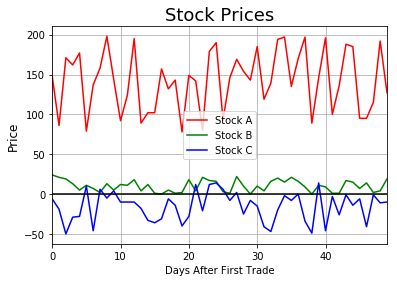

In [33]:
fig = plt.figure()
plt.plot(df1.index,df1['A'],label='Stock A', color='red')
plt.plot(df1.index,df1['B'],label='Stock B', color='green')
plt.plot(df1.index,df1['C'],label='Stock C', color='blue')

plt.plot(df1.index,0*df1.index,color='black') #Horizontal line

plt.xlabel('Days After First Trade', size=10)
plt.ylabel('Price',size=12)
plt.legend()
plt.title('Stock Prices',size=18)
plt.grid()
plt.xlim(0,49)
plt.show()

We can also control the style in which these lines are graphed.  As an additional argument between y-axis and the label, we can specify the `linestyle`.  The four choices are `'-', '--', '-.', `and` ':'` which are solid, dashed, dash-dot, and dotted lines, respectively.  Let's change both the linestyle and the linewidth of each of the `df1` columns:

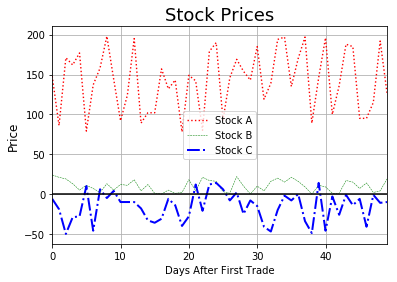

In [34]:
fig = plt.figure()
plt.plot(df1.index,df1['A'],':',label='Stock A', color='red',linewidth=1.4)
plt.plot(df1.index,df1['B'],'--',label='Stock B', color='green',linewidth=0.5)
plt.plot(df1.index,df1['C'],'-.',label='Stock C', color='blue',linewidth=2)
plt.plot(df1.index,0*df1.index,color='black')
plt.xlabel('Days After First Trade', size=10)
plt.ylabel('Price',size=12)
plt.legend()
plt.title('Stock Prices',size=18)
plt.grid(b=True)
plt.xlim(0,49)
plt.show()

### Date Formatting

Let us read in the `timeseries_1.csv` [data set](https://drive.google.com/open?id=1QXUa0_UpXVyHGuITW8J1dtEfId4KDAbU) again, and do some date formatting:

In [35]:
df2 = pd.read_csv('timeseries_1.csv',index_col=0,parse_dates=True)
df2.head()

FileNotFoundError: File b'timeseries_1.csv' does not exist

Let's plot the `high` and `low` columns:

In [ ]:
fig = plt.figure()
plt.plot(df2.index,df2['high'],label='High', color='red')
plt.plot(df2.index,df2['low'],label='Low', color='blue')
plt.xlabel('Time', size=15)
plt.ylabel('Price',size=15)
plt.legend()
plt.xlim(df2.index[0],df2.index[-1])
plt.title('Futures Prices',size=18)
plt.grid()
plt.show()

Matplotlib will try to condense the information on the axis labels to remove anything unnecessary.  In our case, since all of the prices happen on the same day, it will just display the time.  It's often easier to read datetimes as axis labels if they're tilted slightly. This can be accomplished using the command `fig.autofmt_xdate()`, which will auto-format datetimes that appear as x-axis labels.

In [ ]:
fig = plt.figure()
plt.plot(df2.index,df2['high'],label='High', color='red')
plt.plot(df2.index,df2['low'],label='Low', color='blue')
plt.xlabel('Time', size=15)
plt.ylabel('Price',size=15)
plt.legend()
plt.title('Futures Prices',size=18)
plt.grid()
fig.autofmt_xdate()
plt.show()

Another example is using dates instead of times:

In [ ]:
df3 = pd.DataFrame({'Temperature':np.random.randint(10,32,30)},index=pd.date_range('2016-06-01',periods=30,freq='12H'))

In [ ]:
fig = plt.figure()
plt.plot(df3.index,df3['Temperature'],label='Temp')
plt.xlabel('Time', size=15)
plt.ylabel('Temperature',size=15)
plt.legend()
plt.title('Temperatures on a 12 Hour Scale',size=18)
plt.grid()
plt.tick_params(axis='x', labelsize=10)
plt.xlim(df3.index[0],df3.index[-1])
fig.autofmt_xdate()
plt.show()

Compare it to leaving the dates horizontal, with a larger font-sized tick label:

In [ ]:
fig = plt.figure()
plt.plot(df3.index,df3['Temperature'],label='Temp')
plt.xlabel('Time', size=15)
plt.ylabel('Temperature',size=15)
plt.legend()
plt.title('Temperatures on a 12 Hour Scale',size=18)
plt.grid()
plt.tick_params(axis='x', labelsize=10)
plt.xlim(df3.index[0],df3.index[-1])
plt.tick_params(axis='x', labelsize=15)
#fig.autofmt_xdate()
plt.show()

### Markers

For broken-line graphs, like we've been seeing, we can emphasize our actual data points by placing markers at their locations.  A few common markers are (`"."`,point),(`","`,pixel),(`"o"`,circle), and (`"D"`,diamond).  Alternatively, we can specify the linestyle as `.-` which gives a solid line graph with dots:

In [ ]:
fig = plt.figure()
plt.plot(df1.index,df1['A'],'.-',label='Stock A', color='red',linewidth=1.4)
plt.plot(df1.index,df1['B'],label='Stock B',marker='o' ,color='green',linewidth=0.5)
plt.plot(df1.index,df1['C'],label='Stock C',marker='D', color='blue',linewidth=2)
plt.plot(df1.index,0*df1.index,color='black')
plt.xlabel('Days After First Trade', size=10)
plt.ylabel('Price',size=12)
plt.legend()
plt.title('Stock Prices',size=18)
plt.grid(b=True)
plt.xlim(0,49)
plt.show()

For a list of markers, please see:
https://matplotlib.org/api/markers_api.html

### Graphing Functions

The examples we have looked at have involved graphing discrete data sets.  How would we try to graph a continuous function, like $\sin(x)$, or $e^{-x^2/2}$?  The answer is that we have to create a series of data points for Matplotlib to use as the x-axis. This has to be fine enough so that when it interpolates between the points with lines, it's not noticeable to the eye.

To accomplish this, we're going to use the `np.arange()` function (note:  it's not "arrange", it's a range).  This function will produce a sequence of evenly spaced points, with syntax `np.arange(start,end,step)`.

In [ ]:
np.arange(0,10,0.5)

In [ ]:
t = np.arange(0.0, 1.0+0.01, 0.01)
s = np.sin(2*np.pi * t)
plt.plot(t, s)
plt.show()

What would happen if we had changed the step size from 0.01 to 0.1?

In [ ]:
t = np.arange(0.0, 1.0+0.01, 0.1)
s = np.sin(2*np.pi * t)
plt.plot(t, s)
plt.show()

In the same way we've adjusted other graphs, we could make it look more like a graph that would appear in a math textbook: 

In [ ]:
t = np.arange(0.0, 1.0+0.01, 0.01)
s = np.sin(2*np.pi * t)
plt.plot(t, s)
plt.plot(t,0*t,color='black')
plt.xlim(0,1)
plt.grid()
plt.show()

As a rule of thumb, keeping the step to a hundredth of the total range works well in order to keep the graph looking smooth:

In [ ]:
t = np.arange(1.0, 100.0+1, 1)
l = np.log(t/2)
plt.plot(t, l)
plt.show()

Compare to thsi step size:

In [ ]:
t = np.arange(1.0, 100.0+1, 10)
l = np.log(t/2)
plt.plot(t, l)
plt.show()

These tools will allow us to graph both data sets and mathematical functions on the same graph.  This will be a good  way to visually inspect any models we create.

### Outputting Files

We can write any graph we make to a file, to use in other aspects of projects. To accomplish this, replace `plt.show()` with the command `plt.savefig('filepath')`.  One thing to note is that the default size of the picture file that is generated is fairly small, but we can control it by setting the dpi.  Let's compare the default with an adjusted output using a previous example:

In [ ]:
fig = plt.figure()
plt.plot(df3.index,df3['Temperature'],label='Temp')
plt.xlabel('Time', size=15)
plt.ylabel('Temperature',size=15)
plt.legend()
plt.title('Temperatures on a 12 Hour Scale',size=18)
plt.grid()
plt.tick_params(axis='x', labelsize=10)
plt.xlim(df3.index[0],df3.index[-1])
plt.tick_params(axis='x', labelsize=15)
fig.autofmt_xdate()
plt.savefig('default_dpi.png')

my_dpi=96
plt.savefig('adjusted_dpi.png',dpi=my_dpi*2)


The resolution of the default is 864x720, whereas the adjusted is 2304x1920.

### Subplots

One nice feature of Matplotlib is the ability to output multiple graphs in the same image.  This is accomplished using  `gridspec` to create subplots. First, we declare the size of the subplots with `GridSpec(rows,columns)`, and then we plot our individual plots using `plt.subplot2grid()` with the following syntax:

`GridSpec(number of rows, number of columns)`<br>
`plt.subplot2grid((grid rows, grid columns), (plot row position, plot column position))`<br>
`plt.plot(x,y)`

We'll plot both the high and the low from `df2`, with one stacked on top of the other. This means we have 2 rows, 1 column, and the positions will be `(0,0)` and `(1,0)` (since we count from 0):

In [ ]:
import matplotlib.gridspec as gridspec

fig = plt.figure()
# set up subplot grid; how many rows and columns
gridspec.GridSpec(2,1)

plt.subplot2grid((2,1), (0,0))  # (2,1) = total plot size, (0,0) = coordinates for *this* plot
plt.plot(df2.index,df2['high'],label='High', color='red')
plt.xlabel('Time', size=12)
plt.ylabel('Price',size=12)
plt.legend()
plt.xlim(df2.index[0],df2.index[-1])
plt.title('Futures Prices',size=18)
plt.grid()
fig.autofmt_xdate()

plt.subplot2grid((2,1), (1,0))
plt.plot(df2.index,df2['low'],label='Low', color='blue')
plt.xlabel('Time', size=12)
plt.ylabel('Price',size=12)
plt.legend()
plt.xlim(df2.index[0],df2.index[-1])
plt.grid()
fig.autofmt_xdate()

plt.show()

We can even make more complicated arrangements by stretching graphs over multiple columns.  We'll make a subplot of the volume, open, and close prices. The volume will be 2x2 rows and columns, and each of the open and close will be 1x1 underneath.  We stretch by<br> `plt.subplot2grid((r1,c1),(px,py),colspan=n,rowspan=m)`:

In [ ]:
gridspec.GridSpec(3,2)

# Three rows, two columns.  The volume will be at position (0,0) and will span 2 rows and 2 columns.  The open and close 
# will be at positions (2,0) and (2,1), and will be normal sized.
plt.subplot2grid((3,2), (0,0),colspan=2,rowspan=2)
plt.plot(df2.index,df2['volume'],label='Vol', color='green')
plt.xlabel('Time', size=12)
plt.ylabel('Qty',size=12)
plt.legend()
plt.xlim(df2.index[0],df2.index[-1])
plt.title('Futures Prices',size=18)
plt.grid()

plt.subplot2grid((3,2), (2,0))
plt.plot(df2.index,df2['open'],label='Open', color='red')
plt.xlabel('Time', size=12)
plt.ylabel('Price',size=12)
plt.legend()
plt.xlim(df2.index[0],df2.index[-1])
plt.grid()
fig.autofmt_xdate()

plt.subplot2grid((3,2), (2,1))
plt.plot(df2.index,df2['close'],label='Close', color='blue')
plt.xlabel('Time', size=12)
plt.ylabel('Price',size=12)
plt.legend()
plt.xlim(df2.index[0],df2.index[-1])
plt.grid()
fig.autofmt_xdate()

plt.show()

### Exercise:

How would we plot these three using 2 rows and 2 columns, stretching the volume vertically, and having the open & close unstretched and vertically stacked to the right of the volume?

# Exercise:

1. 1. To see some of the issues with calling `.plot()` on an entire dataframe without considering carefully what the columns contain, try `df2.plot()` using the `df2` dataframe of prices from above.  Why does this occur?  
  2. Create a vertically stacked set of two graphs using `df2`.  The top graph will contain all of the price data together, and the bottom graph will contain the volume data.  Choose different colours for each data set.  (Note: you can use hex colour codes when defining colours, e.g.: `color=#19F0B9`.  You can use the following RGB to Hex converter http://www.rgbtohex.net/)
  
2. Use the file customer_data.csv to perform the exercise.    
  1. Create a new DataFrame called construction which contains all the customers in the "Construction" industry with over 0 spend on mobility products. Using this DataFrame, create a scatterplot with Mobility revenue on the vertical axis and number of employees on the horizontal axis. Does this tell you anything about the relationship between Mobility revenue and number of employees? What does it tell you?
   2. Copy the code from part (1) and add in two lines underneath: plt.xscale('log') and plt.yscale('log'). These two lines rescale the axes. Instead of showing the raw figures, the logarithm of the figures is shown instead. This is often a useful transformation for data that is extremely skewed. How does the rescaled plot differ from the plot you created in part 1? Why? Can you discern anything about the relationship between Mobility revenue and number of employees that you couldn't before?
   3. Repeat parts (1) and (2) for the Agriculture industry. How does the relationship between Mobility and number of employees differ in this industry when compared the Construction industry? Why do you think that might be?

In [ ]:
#Forget question 1, do question 2

## Seaborn

Seaborn is a great package for visualizing statistical graphs. It has an easy to use syntax and the results look much nicer than the default *Matplotlib* graphs. The downside is its focus is more limited, and it isn't quite as customizable, regardless of this, it can be of great use to us. We should think of *Seaborn* and *Matplotlib* as complementary packages, each of which has their strengths and weaknesses.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Controling Basic style

To understand *Seaborn* let's start with visualizing some simple data. We're going to draw $10,000$ points from $3$ normal distributions (the exact definition of a normal distribution will come later, but for now just think bell shape).

In [ ]:
normal_data = np.random.normal(size=(10000, 3)) + np.arange(3) / 2

Let's plot the data using a *violin plot*. This plot becomes wider around points where there is more data, it's a great tool for visualizing how data is distributed:

In [ ]:
sns.violinplot(data=normal_data);
#

Visually this is similar to a *Matplotlib* diagram (the solid white background), if we wanted to change the style we could use the `set_style()` method:

In [ ]:
sns.set_style("whitegrid")
sns.violinplot(data=normal_data)

We could also go for a dark theme:

In [ ]:
sns.set_style("dark")
sns.violinplot(data=normal_data)

For now let's stick with normal white:

In [ ]:
sns.set_style("white")
sns.violinplot(data=normal_data)

By using the ` despine` method you can remove the boundary boxes on axis which do not have data, this will give you a cleaner looking plot. 

In [ ]:
sns.violinplot(data=normal_data)
sns.despine()

These are just some of the ways of controlling the look of your figures, for a more indepth look see: https://seaborn.pydata.org/tutorial/aesthetics.html

### Useful Plots

*Seaborn* has a large array of plots, for the remainder of this lecture we will look at some of the more useful plots that we will encounter as data scientists.

#### Violin Plots

We've already seen violin plots for some synthetic data, but let's look at something more interesting, the *titanic* voyage data. We can load up the data into a dataframe:

In [ ]:
#seaborn has datasets in it, like the titanic datset
titanic_df = sns.load_dataset("titanic")
titanic_df.head()
#titanic_df.info()

Let's see if there are any interesting patterns between a passangers age and the cabin class. To do this we can pass in the data frame to the `violinplot` method and specify what the `x` and `y` axis are.

In [ ]:
sns.violinplot(x="class", y="age", data=titanic_df)

Right away we see that the second and third class cabins tend to have younger people (there are large bulges between 20 and 40 years of age), while the first class cabin is more spread out over all age ranges. 

What if we want to examine one more split in the data? Let's say we wanted to know if there was a gender difference in the cabin composition, we could examine this with a split violin plot. It's almost the same as the violin plots we've seen, but now each violin is split down the middle, each half representing a different variable. If we split the violin plot on gender we get:

In [ ]:
#sns.violinplot(x="class", y="age", hue="sex", data=titanic_df, split=True)

sns.violinplot(x="class", y="age", hue="sex", data=titanic_df, split=True, cut=0)

In [ ]:
sns.violinplot(x="class", y="age", hue="alive", data=titanic_df, split=True)

In [ ]:
titanic_df[titanic_df['age'].isna()].groupby('class').count()

In [ ]:
titanic_df.isna().sum()

From this we can see the men in first class tended to be older than the women in the same cabin. Is there anything else that obviously that stands out in this plot?

#### Linear Regression

Another plot we will see is a linear regression. Simply put, it fits a line which is best able to explain the relation between the variables on the $x$ and $y$ axis. For example, let's try and find the relation between the following two dimensions in some data:

In [ ]:
data_x = np.arange(0,1,.01)
data_y = data_x + (np.random.randn(data_x.shape[0])*.1)
sns.regplot(x=data_x, y=data_y);

In [ ]:
data_x = titanic_df['age']
data_y = titanic_df['fare']
sns.regplot(x=data_x, y=data_y);
plt.ylim(0,300)
plt.show()

The upward slope of the regression line indicates that as the x value increases the y also tends to increases (it should since we generated the data to do this)!

#### Logistic Regression

The final type of plot we will look at is logistic regression. We're going to spend an entire lecture on this later, but for now we'll just need the basic idea. It is a simple model we use to estimate the probability of an outcome based on underlying factors. For example, we may wish to build a model, which given a datapoint predicts how likely it is to belong to a certain class. Again, we can use the `regplot` command to fit a logistic regression curve.

In [ ]:
x_data = np.random.rand(1000)
y_data = []

for i in x_data :
    y_data.append(np.random.binomial(1,i))

y_data = np.array(y_data)

sns.regplot(x=x_data, y=y_data, logistic=True);

Each point on the plot is a data point, if it is at 1 that point belongs to some class (since the data is synthetic the name is unimportant), 0 means it does not. The x axis is pretty dense, so it's hard to get an idea of how many points are located. One fix involves slightly offsetting each point vertically using the `y_jitter`. 

In [ ]:
sns.regplot(x=x_data, y=y_data, logistic=True, y_jitter=0.09);

Now we have a clearer picture of how points were distributed across the x axis (the way this is represented is similar to a violin plot). 

The curve is the model estimate on the probability that a datapoint belongs to the class or not, it is sloping upwards which means as we get larger x values it assigns a higher probability to belonging to the class. The grey region around the model is the *confidence interval*, the wider it is the less confident the model is about its prediction.

### Exercise:

Load up and look at the dataset contained in `tips`, and try the following questions.

1. Is there a noticable difference in how much people spent at lunch and dinner? What plot best visualizes this? How do you define what someone spent, is it just the bill, or does it include the tip? What if we wanted to see how gender influenced this, how would you adjust your plots?
2. What is the best plot to explain the relation between the bill and the tip? Plot this. Does it appear people are tipping in a fair way?
3. Is there a noticable difference between the amount payed (again how do you define this) according to the meal time? What plot best visualizes this? There could be multiple plots which accomplish this. What if we wanted to predict the meal time based on the amount payed, is one of the previous plots more appropriate? If you want to plot something it must be in numeric form, you should covert some of the non numberic columns to a binary representation (`np.where` can help you here). Repeat this question but with the other binary variables (gender / smoker).

In [ ]:
tips_df = sns.load_dataset('tips')
tips_df.head()